# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        n_objects = X.shape[0]
        y_pred = X.dot(w)
        loss = np.sum((y_pred - y) ** 2) / n_objects
        return loss
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        y_pred = X.dot(w)
        grad = 2 * X.T.dot(y_pred - y) / n_objects
        return grad
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_current = w_init.copy()
    trajectory = [w_current.copy()]

    for _ in range(n_iterations):
        grad = loss.calc_grad(X, y, w_current)
        w_current = w_current - lr * grad
        trajectory.append(w_current.copy())

    return trajectory

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

***Здесь и далее я буду менять значение n_iterations, так как если я этого не буду делать, при lr=0.1 градиентный спуск уйдет в бесконечность. Оно будет равно $\frac{10}{lr}$***

Интерпретация: величина шага влияет на то, как быстро градиентный спуск подбирает оптимальные параметры для модели (код работает быстрее, и нужно меньше шагов (это в случае, если у нас есть критерий остановки, у нас такого нет)). Однако если выбрать слишком большой шаг, то спуск может вечно перепрыгивать оптимум, а в некоторых случаях и отдаляться от него. Это и происходит при lr = 0.1, у нас значения уходят в бесконечность, из-за чего градиентный спуск не работает.

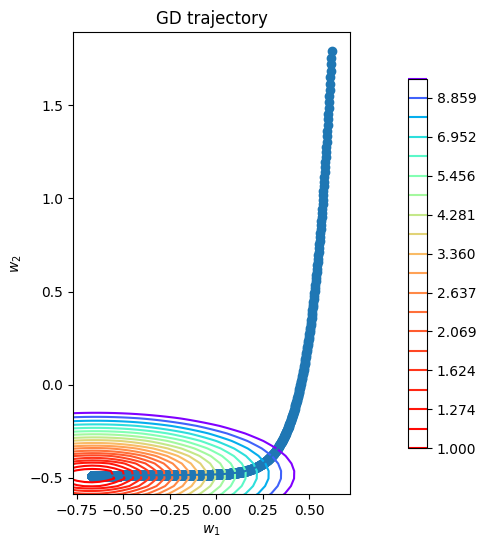

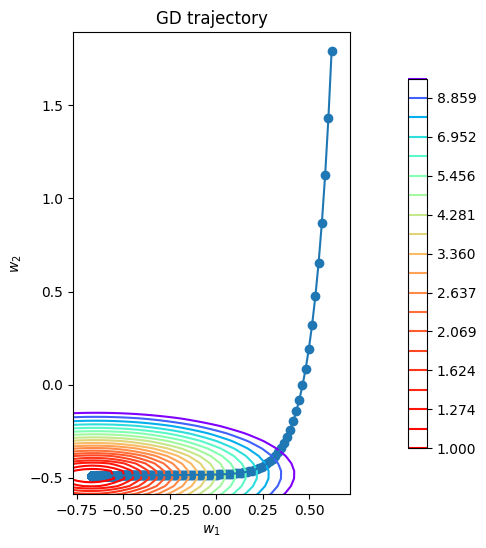

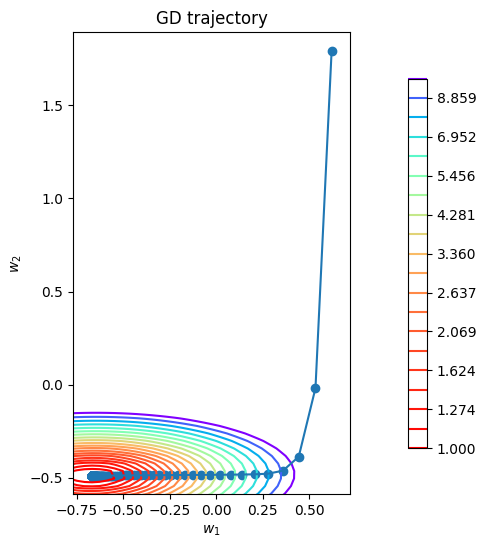

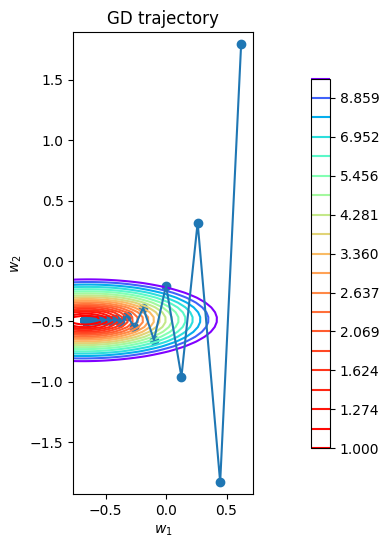

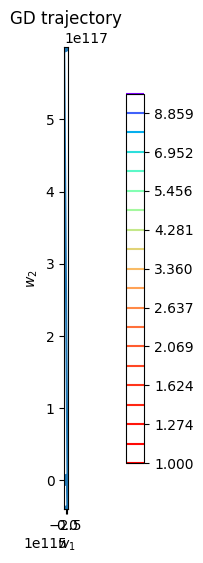

In [9]:
lr_values = [0.0001, 0.001, 0.005, 0.01, 0.1]

for lr in lr_values:
    trajectory = gradient_descent(w_init, X, y, loss, lr, n_iterations=int(10/lr))
    plot_gd(trajectory, X, y, loss)

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_current = w_init.copy()
    trajectory = [w_current.copy()]

    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(X_batch, y_batch, w_current)
        w_current = w_current - lr * grad
        trajectory.append(w_current.copy())

    return trajectory

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Интерпретация: про влияние lr я написал выше. Чем больше batch_size, тем больше поведение стохастического градиентного спуска похоже на обычный. С другой стороны, чем меньше batch_size, тем менее стабильно работает спуск, так как он очень долго ходит вокруг оптимума(см. на lr = 0.01, batch_size = 10). 

lr = 0.0001, batch_size = 10


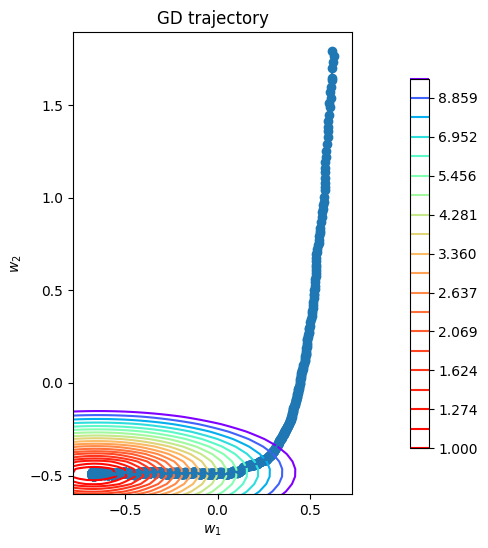

lr = 0.0001, batch_size = 50


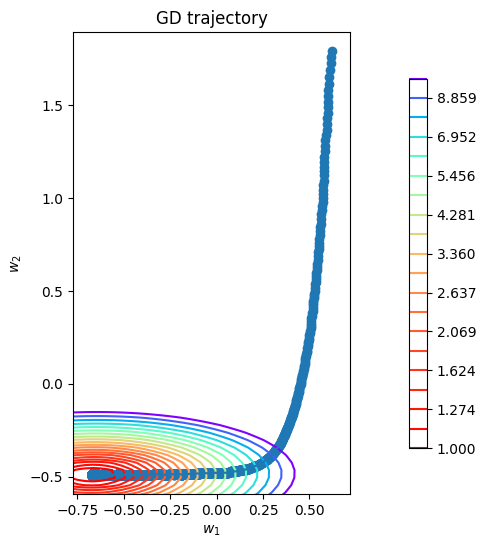

lr = 0.0001, batch_size = 100


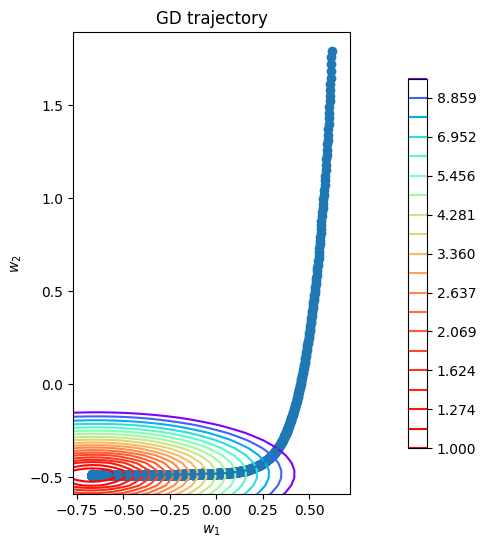

lr = 0.0001, batch_size = 200


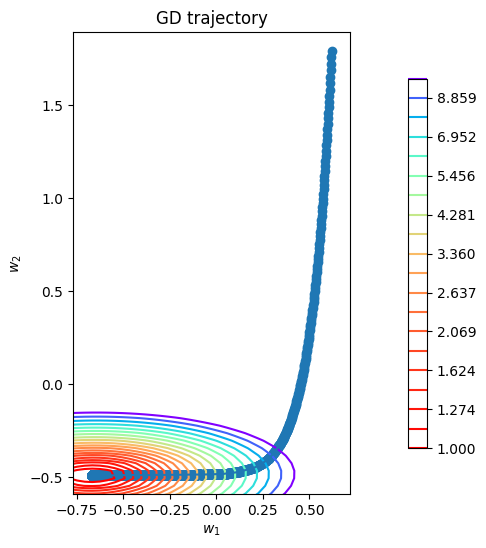

lr = 0.001, batch_size = 10


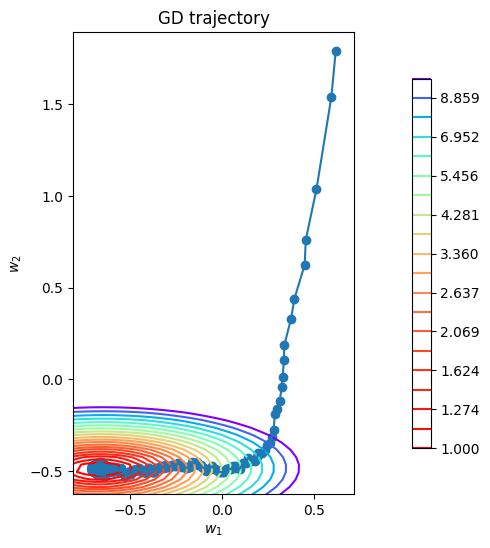

lr = 0.001, batch_size = 50


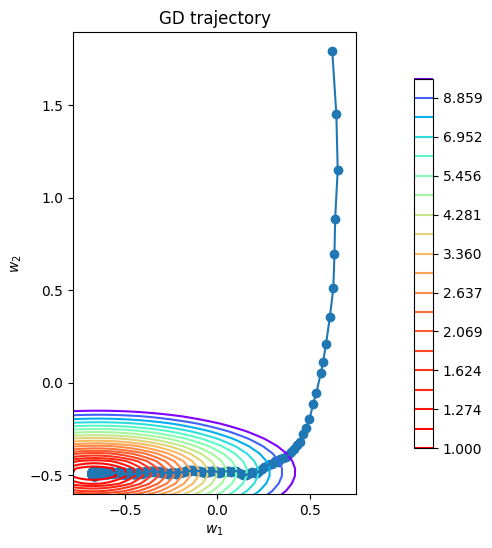

lr = 0.001, batch_size = 100


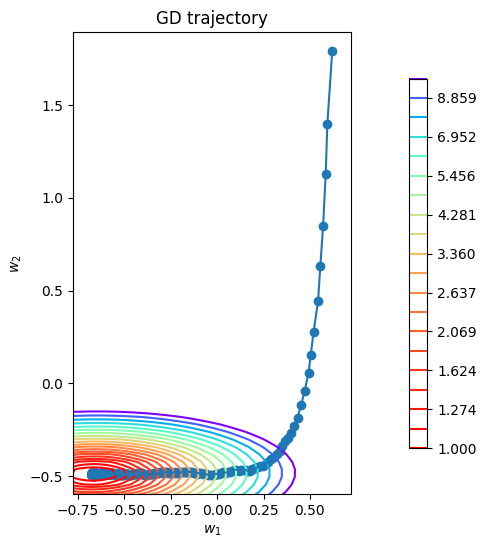

lr = 0.001, batch_size = 200


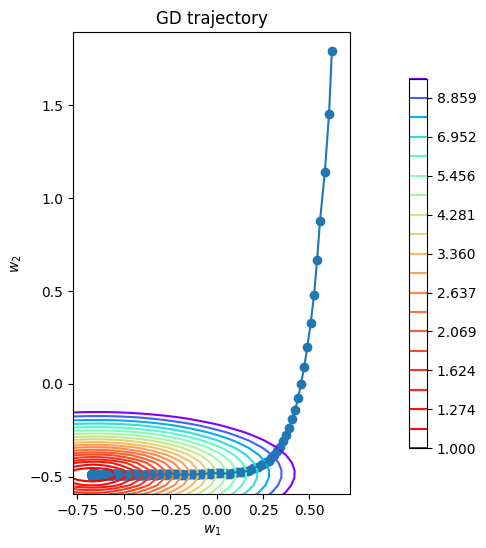

lr = 0.01, batch_size = 10


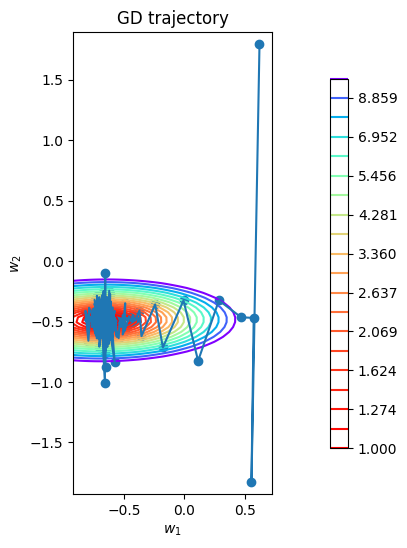

lr = 0.01, batch_size = 50


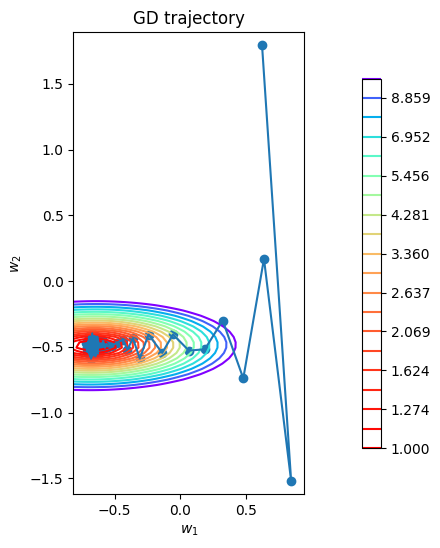

lr = 0.01, batch_size = 100


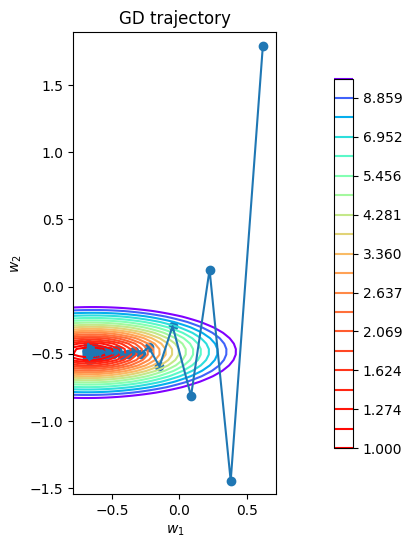

lr = 0.01, batch_size = 200


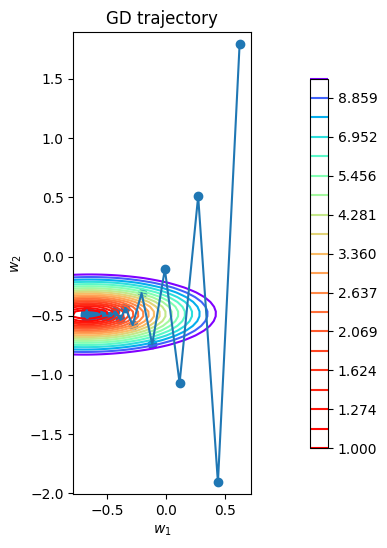

lr = 0.1, batch_size = 10


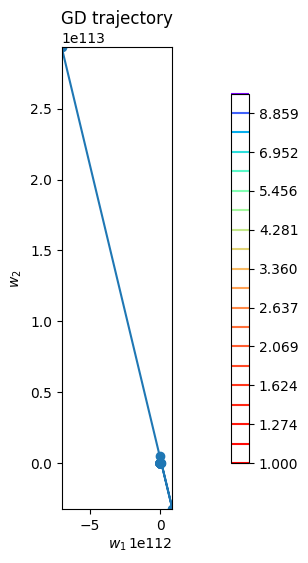

lr = 0.1, batch_size = 50


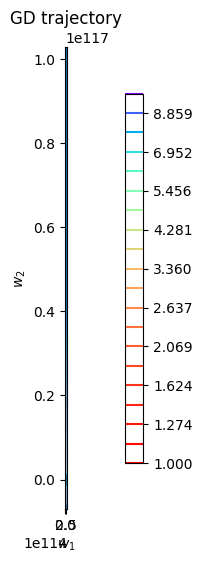

lr = 0.1, batch_size = 100


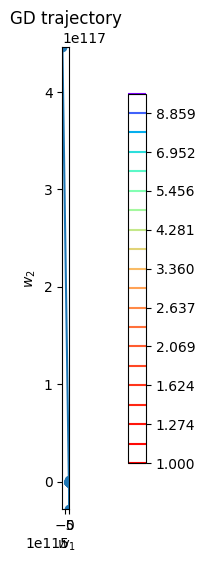

lr = 0.1, batch_size = 200


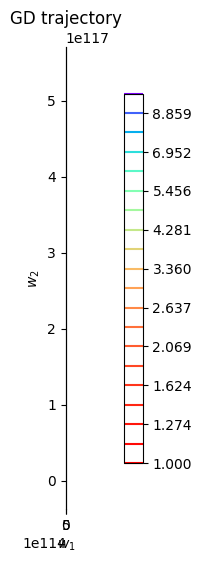

In [11]:
lr_values = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [10, 50, 100, 200] #Да, я строил 16 графиков()

# Создадим и визуализируем траектории для различных значений lr и batch_size
for lr in lr_values:
    for batch_size in batch_sizes:
        print(f'lr = {lr}, batch_size = {batch_size}') #для себя, чтобы не запутаться
        trajectory = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, n_iterations=int(10/lr))
        plot_gd(trajectory, X, y, loss)

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_current = w_init.copy()
    trajectory = [w_current.copy()]
    
    s0 = 1.0
    
    for t in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_X = X[batch_indices]
        batch_y = y[batch_indices]
        grad = loss.calc_grad(batch_X, batch_y, w_current)
        w_current = w_current - lr * grad
        trajectory.append(w_current.copy())
        lr = lr * (s0/(s0 + t)) ** p
    
    return trajectory

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

Интерпретация: чем больше p, тем сильнее затухает шаг градиентного спуска. Даже при p=0.1 спуск не доходит до оптимальных значение, а при росте p он заканчивается очень далеко от оптимума. Зато код работает быстрее, так как очень мало шагов.

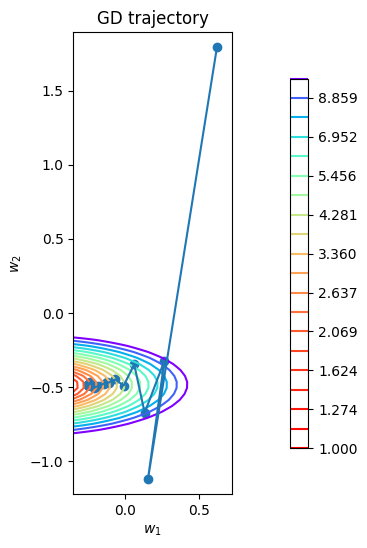

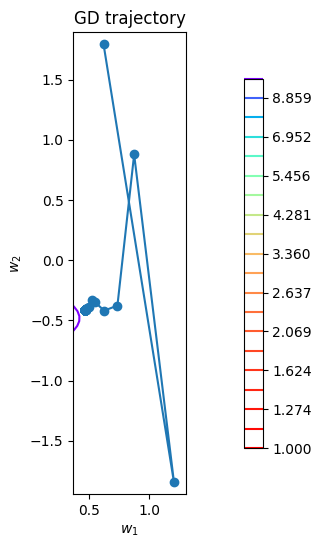

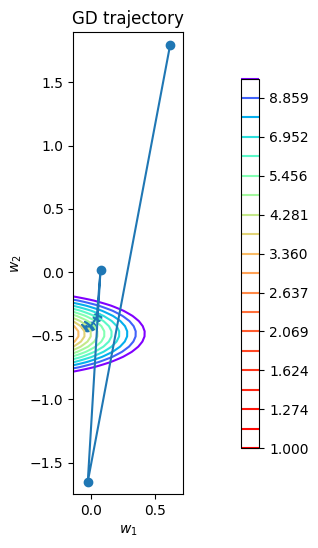

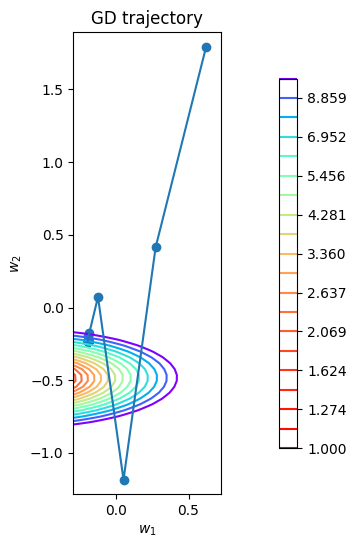

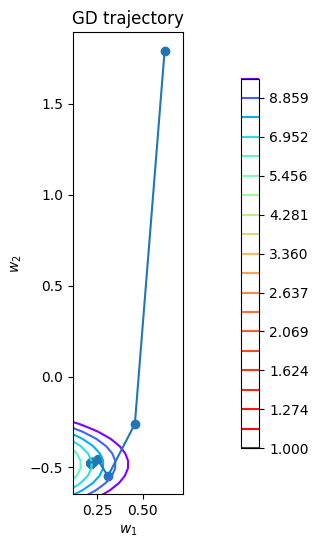

In [13]:
lr = 0.01
batch_size = 10
p_values = [0.1, 0.3, 0.5, 0.7, 1.0]

for p in p_values:
    trajectory = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p)
    plot_gd(trajectory, X, y, loss)

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

Сначала DG сходится быстрее (1), затем SGD его перегоняет(2), но после этого сходимость SGD заканчивается, и в итоге величина ошибки обычной GD ниже, чем у стохастического(3).

(1) объясняется тем, что GD использует информацию о градиенте функции потерь, вычисленного по всей выборке данных, что позволяет ему делать более точные шаги в направлении минимизации функции ошибки. 

(2) происходит потому, что стохастический градиентный спуск использует только случайные подвыборки данных на каждой итерации, что позволяет ему быстрее обновлять веса модели и делать более "резкие" шаги в направлении глобального минимума. Но это не всегда так происходит! Если менять зерно генерации, то на графике такого участка может не быть

(3) из-за того, что SDG использует не все данные выборки, его точность снижается, из-за чего он не может достигнуть тех же значений ошибки, что и обычный градиентный спуск.

Также тот факт, что в данной ситуации у нас шаг SGD затухает, из-за чего он заканчивает сходиться. Но если этого не будет (сделав p = 0), SGD будет колебаться и быть то выше, то ниже, чем обычный градиентный спуск.

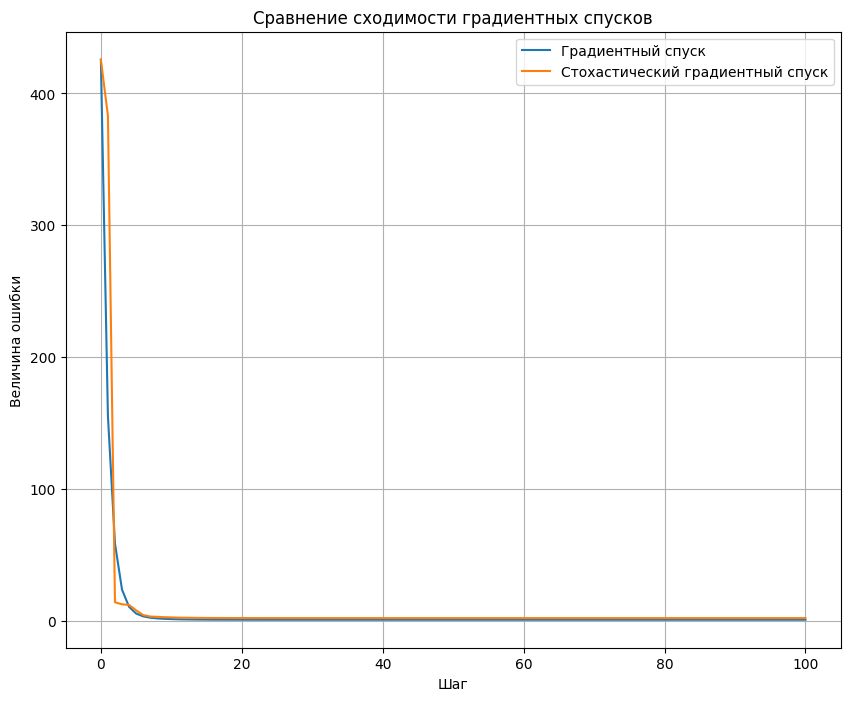

In [14]:
np.random.seed(1337)
batch_size = 10
n_iterations = 100 #я так чувствую
lr = 0.01 #я так чувствую
p = 0.1  #я так чувствую
trajectory_gd = gradient_descent(w_init, X, y, loss, lr, n_iterations)

trajectory_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, n_iterations)

# Вычисление значений функции потерь для каждой итерации
loss_values_gd = [loss.calc_loss(X, y, w) for w in trajectory_gd]
loss_values_sgd = [loss.calc_loss(X, y, w) for w in trajectory_sgd]

# Построение графика
plt.figure(figsize=(10, 8))
plt.plot(range(n_iterations + 1), loss_values_gd, label='Градиентный спуск')
plt.plot(range(n_iterations + 1), loss_values_sgd, label='Стохастический градиентный спуск')
plt.title('Сравнение сходимости градиентных спусков')
plt.xlabel('Шаг')
plt.ylabel('Величина ошибки')
plt.legend()
plt.grid(True)
plt.show()

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [15]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
        self.w = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.w = np.random.randn(X.shape[1])
        trajectory = gradient_descent(self.w, X, y, self.loss, self.lr, n_iterations=int(10/lr))
        self.w = trajectory[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y_pred = X.dot(self.w)

        return y_pred

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [16]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [17]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [18]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_raw.columns = X_raw.columns.astype(str)


X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=52)

numerical_features = X_train.select_dtypes(include=["float64", "int64"]).columns
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()) #я выбрал такую нормализацию
])

categorical_features = X_train.select_dtypes(include=["object"]).columns
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), #написано заполнить, я заполнил()
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [20]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [21]:
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression(MSELoss())
linear_regression.fit(X_train, y_train)
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Обычный MSE на обучающей:", train_mse)
print("Обычный MSE на тестовой:", test_mse)

Обычный MSE на обучающей: 2037860.5823432326
Обычный MSE на тестовой: 6924449.528976873


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [22]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        loss = np.mean((X.dot(w) - y) ** 2)
        loss += self.coef * np.sum(w[:-1] ** 2)
        return loss
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        y_pred = X.dot(w)
        grad = 2 * X.T.dot(y_pred - y) / len(y)
        grad[:-1] += 2 * self.coef * w[:-1]
        return grad
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [23]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

### И здесь, и в задании на Huber Loss я выбирал такие гиперпараметры, чтобы ошибка на тестовой выборке была ниже, чем на обучающей. Но это происходит далеко не всегда, для такого пришлось сильно жертвовать ошибкой на обучающей выборке. Однако в большинстве случаев ошибка на тестовой немного падает, а на обучающей растет. Но я хотел победить переобучение, поэтому получилось вот так) 

**Upd: я показал 2 случая: 1) когда нет переобучения, 2) когда переобучение есть, но оно стало сильно меньше, и при этом ошибки меньше, чем в случае 1)**

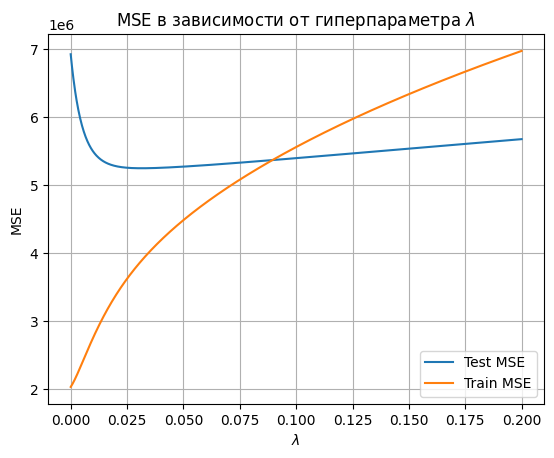

In [24]:
coefs = np.linspace(0, 0.2, 1000)

test_mse_values = []
train_mse_values = []

for coef in coefs:
    linear_regression = LinearRegression(MSEL2Loss(coef))
    linear_regression.fit(X_train, y_train)
    y_train_pred = linear_regression.predict(X_train)
    y_test_pred = linear_regression.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)    
    test_mse_values.append(test_mse)
    train_mse_values.append(train_mse)

plt.plot(coefs, test_mse_values, label='Test MSE')
plt.plot(coefs, train_mse_values, label='Train MSE')
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.title('MSE в зависимости от гиперпараметра $\lambda$')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
linear_regression = LinearRegression(MSEL2Loss(0.1))
linear_regression.fit(X_train, y_train)
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("MSE MSEl2 на обучающей:", train_mse)
print("MSE MSEl2 на тестовой:", test_mse)

MSE MSEl2 на обучающей: 5561397.80403145
MSE MSEl2 на тестовой: 5398126.106879888


Ошибка на обучающей выборке выросла, на тестовой - упала, и мы победили переобучение!

In [26]:
linear_regression = LinearRegression(MSEL2Loss(0.05))
linear_regression.fit(X_train, y_train)
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("MSE MSEl2 на обучающей:", train_mse)
print("MSE MSEl2 на тестовой:", test_mse)

MSE MSEl2 на обучающей: 4487929.807415834
MSE MSEl2 на тестовой: 5273625.763939604


Здесь ошибка на обеих выборках ниже, чем при $\lambda = 0.1$, но переобучение все еще есть (хотя оно стало меньше). А ошибка на обучающей все еще выше, чем при обучении на обычном MSE.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [27]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X.dot(w) - y
        loss = np.where(np.abs(z) < self.eps, 0.5 * z**2, self.eps * (np.abs(z) - 0.5 * self.eps))
        return np.mean(loss)
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X.dot(w) - y
        grad = X.T.dot(np.where(np.abs(z) < self.eps, z, self.eps * np.sign(z))) / len(y)
        return grad
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

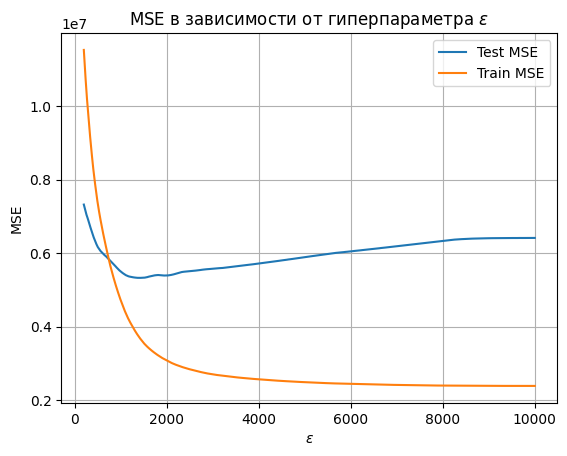

In [28]:
epsilons = np.linspace(200, 10000, 1000)

test_mse_values = []
train_mse_values = []

for epsilon in epsilons:
    linear_regression = LinearRegression(HuberLoss(epsilon))
    linear_regression.fit(X_train, y_train)
    y_train_pred = linear_regression.predict(X_train)
    y_test_pred = linear_regression.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mse_values.append(test_mse)
    train_mse_values.append(train_mse)

plt.plot(epsilons, test_mse_values, label='Test MSE')
plt.plot(epsilons, train_mse_values, label='Train MSE')
plt.xlabel('$\epsilon$')
plt.ylabel('MSE')
plt.title('MSE в зависимости от гиперпараметра $\epsilon$')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
linear_regression = LinearRegression(HuberLoss(700))
linear_regression.fit(X_train, y_train)
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("MSE Huber на обущающей:", train_mse)
print("MSE Huber на тестовой:", test_mse)

MSE Huber на обущающей: 6067249.463906804
MSE Huber на тестовой: 5889087.313381621


Ошибка на обучающей выборке ошибка снова сильно выросла, на тестовой - упала. И мы победили переобучение!

In [30]:
linear_regression = LinearRegression(HuberLoss(1500))
linear_regression.fit(X_train, y_train)
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("MSE Huber на обущающей:", train_mse)
print("MSE Huber на тестовой:", test_mse)

MSE Huber на обущающей: 3556830.477604085
MSE Huber на тестовой: 5327755.631259437


Здесь ошибка на обеих выборках ниже, чем при $\epsilon = 700$,но переобучение все еще есть (хотя оно стало меньше). А ошибка на обучающей все еще выше, чем при обучении на обычном MSE.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

<a href="https://ibb.co/R7VPWSr"><img src="https://i.ibb.co/cx7tdvf/IMG-5344.jpg" alt="IMG-5344" border="0"></a>

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [31]:
def simulated_annealing(X, y, initial_w, initial_temp, cooling_rate, num_iter):
    w_current = initial_w.copy()
    mse_current = mean_squared_error(y, X.dot(w_current))
    best_w = w_current.copy()
    best_mse = mse_current
    for i in range(num_iter):
        new_w = w_current + np.random.standard_t(0.7, size=w_current.shape) #у меня наоборот хорошо получалось при более низком
        mse_new = mean_squared_error(y, X.dot(new_w))        
        if mse_new < mse_current:
            w_current = new_w
            mse_current = mse_new
            if mse_new < best_mse:
                best_w = new_w
                best_mse = mse_new
        else:
            probability = np.exp(-(mse_new - mse_current) / initial_temp)
            if np.random.rand() < probability:
                w_current = new_w
                mse_current = mse_new        
        initial_temp *= cooling_rate

    return best_w, best_mse

np.random.seed(23) #от него все очень сильно зависит, я выбрал зерно генерации, при котором MSE на тестовой ниже, чем на обычной
initial_w = np.random.randn(X_train.shape[1])
initial_temp = 1000
cooling_rate = 0.99
num_iter = 1000

best_w_sa, best_mse_sa = simulated_annealing(X_train, y_train, initial_w, initial_temp, cooling_rate, num_iter)

print("Лучшее MSE обучающей выборки:", best_mse_sa)
print("MSE тестовой выборки для полученных параметров:", mean_squared_error(y_test, X_test.dot(best_w_sa)))

Лучшее MSE обучающей выборки: 5978560.5048626335
MSE тестовой выборки для полученных параметров: 5130384.679723424


In [32]:
np.random.seed(57) #а тут такое зерно, при котором ошибка очень большая
initial_w = np.random.randn(X_train.shape[1])
initial_temp = 1000
cooling_rate = 0.99
num_iter = 1000

best_w_sa, best_mse_sa = simulated_annealing(X_train, y_train, initial_w, initial_temp, cooling_rate, num_iter)

print("Лучшее MSE обучающей выборки:", best_mse_sa)
print("MSE тестовой выборки для полученных параметров:", mean_squared_error(y_test, X_test.dot(best_w_sa)))

Лучшее MSE обучающей выборки: 6303575.976713082
MSE тестовой выборки для полученных параметров: 10971822.115781972
